## 🔍 Objective
To identify and investigate outliers in the Superstore sales data

In [6]:
import pandas as pd

### Initial Inspection & Cleaning

In [8]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
print("🔍 Shape:", df.shape)
print("\n🧠 Column Names:", df.columns.tolist())
print("\n🧼 Missing Values:\n", df.isnull().sum())
print("\n🔎 Duplicated Rows:", df.duplicated().sum())

🔍 Shape: (9994, 13)

🧠 Column Names: ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']

🧼 Missing Values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

🔎 Duplicated Rows: 17


### Remove Duplicate Rows

In [12]:
df = df.drop_duplicates()

In [14]:
df.shape

(9977, 13)

### Sanity Check Summary

In [16]:
print(df.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [18]:
print("🔍 Discount range:", df['Discount'].min(), "to", df['Discount'].max())
print("📦 Quantity range:", df['Quantity'].min(), "to", df['Quantity'].max())
print("💰 Sales range:", df['Sales'].min(), "to", df['Sales'].max())
print("📉 Profit range:", df['Profit'].min(), "to", df['Profit'].max())

🔍 Discount range: 0.0 to 0.8
📦 Quantity range: 1 to 14
💰 Sales range: 0.444 to 22638.48
📉 Profit range: -6599.978 to 8399.976


### Outlier Detection

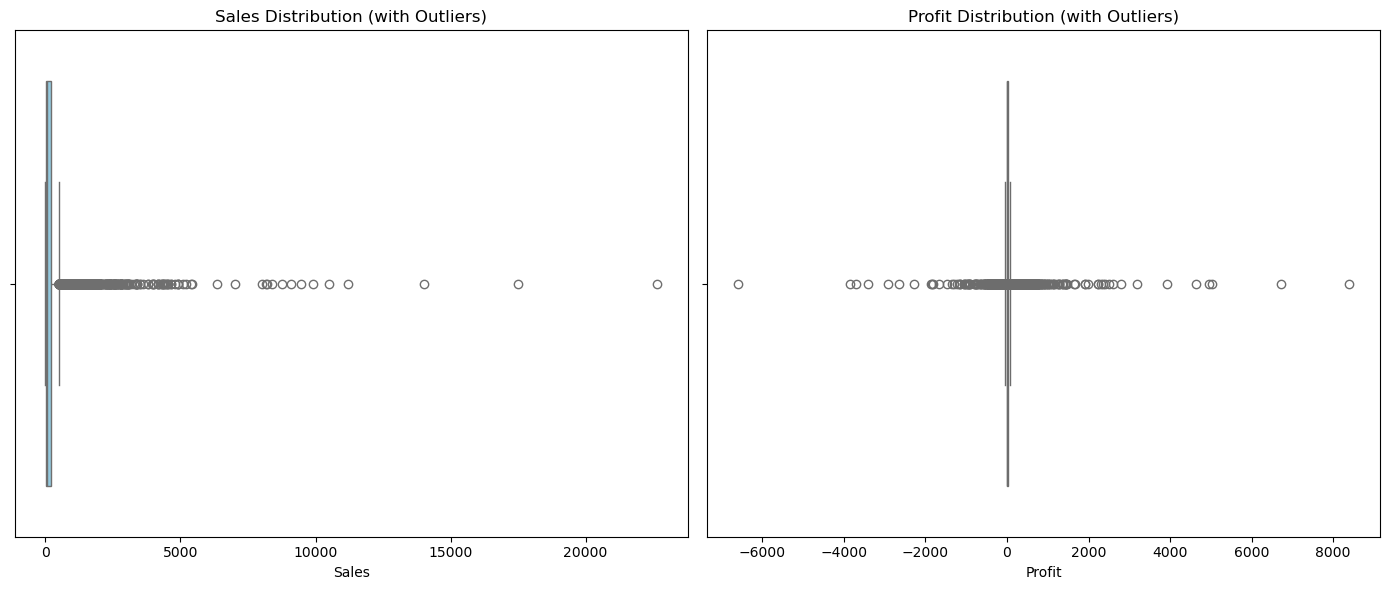

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Sales outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title("Sales Distribution (with Outliers)")

# Profit outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Profit'], color='salmon')
plt.title("Profit Distribution (with Outliers)")

plt.tight_layout()
plt.show()

#### Profit shows a wider variation, ranging from –2000US to +3000US, which might suggest some high-loss or high-gain orders.

### Outlier Detection

In [22]:
from scipy.stats import zscore
import pandas as pd

# Assuming df is your cleaned DataFrame
z_scores = df[['Sales', 'Profit']].apply(zscore)

# Filter rows with Z-score > 3 or < -3
outliers = df[(z_scores.abs() > 3).any(axis=1)]

print(f"Number of outliers detected: {outliers.shape[0]}")
outliers[['Sales', 'Profit']]


Number of outliers detected: 165


,Sales,Profit
27,3083.430,-1665.0522
165,8159.952,-1359.9920
215,1188.000,-950.4000
251,3347.370,636.0003
262,3059.982,-509.9970
...,...,...
9741,4404.900,1013.1270
9774,2177.584,-3701.8928
9857,3393.680,610.8624
9929,2799.960,944.9865


#### Negative profit outliers (e.g., row 27: Sales = 3083.43, Profit = -1665.05).
#### There are also instances where we have high sales but negative profit (e.g., row 165: Sales = 8159.95, Profit = -1359.99).
#### Let's investigate the specific orders with outliers in both Sales and Profit to understand the patterns behind them. 

In [36]:
from scipy.stats import zscore

# Calculate Z-scores for Sales and Profit separately
z_scores_sales = zscore(df['Sales'])
z_scores_profit = zscore(df['Profit'])

# Add Outlier flags for both Sales and Profit
df['Outlier_Sales'] = (z_scores_sales > 3)
df['Outlier_Profit'] = (z_scores_profit > 3)

# Combine the outliers for Sales and Profit
df['Outlier'] = df['Outlier_Sales'] | df['Outlier_Profit']

# Extracting outlier rows
outlier_data = df[df['Outlier'] == True]

# Investigating outliers in Sales and Profit
outlier_data[['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Sales', 'Profit', 'Discount', 'Quantity']]

,Ship Mode,Segment,Category,Sub-Category,Sales,Profit,Discount,Quantity
27,Standard Class,Consumer,Furniture,Bookcases,3083.430,-1665.0522,0.5,7
165,Standard Class,Consumer,Technology,Machines,8159.952,-1359.9920,0.4,8
251,Standard Class,Consumer,Technology,Accessories,3347.370,636.0003,0.0,13
262,Second Class,Corporate,Technology,Machines,3059.982,-509.9970,0.4,3
263,Second Class,Corporate,Technology,Machines,2519.958,-251.9958,0.4,7
...,...,...,...,...,...,...,...,...
9741,Standard Class,Corporate,Furniture,Bookcases,4404.900,1013.1270,0.0,5
9774,Standard Class,Consumer,Office Supplies,Binders,2177.584,-3701.8928,0.8,8
9857,Standard Class,Corporate,Furniture,Tables,3393.680,610.8624,0.0,8
9929,Same Day,Consumer,Technology,Copiers,2799.960,944.9865,0.2,5


#### Lets dive deeper into a sub-category

In [26]:
# Grouping the outlier data by Sub-Category and calculating the sum of Sales and Profit
outlier_by_subcategory = outlier_data.groupby('Sub-Category')[['Sales', 'Profit']].agg(['sum', 'mean', 'std'])

# Display the summary
outlier_by_subcategory


Sales                                Profit               \
                      sum         mean          std         sum         mean   
Sub-Category                                                                   
Accessories    15461.2200  2208.745714   567.330828   4747.7828   678.254686   
Appliances     14085.4900  2347.581667   271.898829   4255.9516   709.325267   
Binders        87553.6380  3648.068250  2272.859827  33260.5240  1385.855167   
Bookcases      23682.7036  3383.243371   887.139226   -570.9920   -81.570286   
Chairs         43125.4270  2875.028467   584.654606   4600.9019   306.726793   
Copiers       106889.0220  5344.451100  4515.142040  43295.1013  2164.755065   
Machines      143997.8630  4799.928767  3944.318030   8555.6858   285.189527   
Phones         37250.7580  3104.229833   837.387444   6629.0855   552.423792   
Storage         5525.8900  2762.945000   242.374991   1414.2435   707.121750   
Supplies       30022.1480  5003.691333  1601.506508  -1144.7834  -190.797233   
Tables         31146.7840  2831.525818   666.514648    211.3574    19.214309   

                           
                      std  
Sub-Category               
Accessories    123.594393  
Appliances      62.758820  
Binders       1578.566872  
Bookcases      808.590207  
Chairs         413.532170  
Copiers       2180.225987  
Machines      2051.142962  
Phones         317.383268  
Storage        120.416537  
Supplies       576.239207  
Tables         755.879311

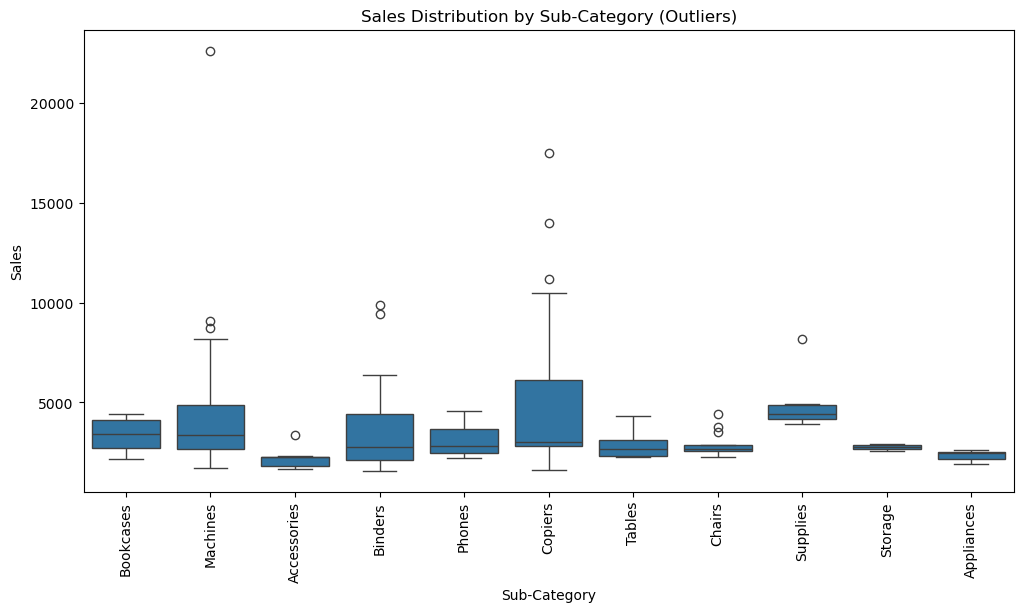

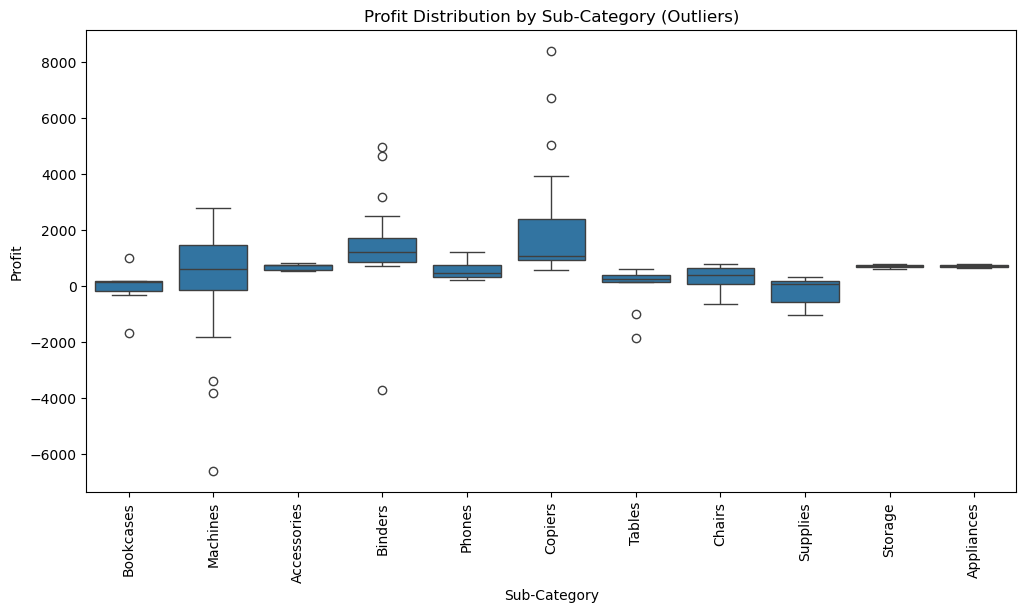

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of Sales for each Sub-Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=outlier_data)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Sub-Category (Outliers)')
plt.show()

# Plotting the distribution of Profit for each Sub-Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Profit', data=outlier_data)
plt.xticks(rotation=90)
plt.title('Profit Distribution by Sub-Category (Outliers)')
plt.show()


#### Interpretation Highlights
#### 💸 High Sales Outliers:
     1. Copiers have the highest average (mean) and total (sum) sales among outliers. But check out that std = 4515.14 — big variance.
     2. Machines and Binders also stand out with very high total and average sales — strong performers with wide sales ranges.
#### 📉 High Profit Variance:
    1. Copiers again dominate with a huge profit mean of $2164.76 and a very high std = 2180.22 → some orders are extremely profitable.
    2. Machines and Binders show large spreads in profits as well.

### Let’s choose "Copies" to dive deeper.

In [30]:
copiers_df = df[(df['Sub-Category'] == 'Copiers') & (df['Outlier'] == True)]
copiers_df.shape  # to confirm how many outlier orders we have

(20, 16)

In [32]:
copiers_df[['Sales', 'Profit', 'Discount', 'Quantity', 'Ship Mode', 'Region', 'Segment', 'Category', 'City', 'State']].describe()


,Sales,Profit,Discount,Quantity
count,20.00000,20.000000,20.000000,20.000000
mean,5344.45110,2164.755065,0.110000,5.450000
std,4515.14204,2180.225987,0.120961,1.503505
min,1599.92000,569.990500,0.000000,3.000000
25%,2799.95600,933.735375,0.000000,4.750000
50%,2999.95000,1084.990900,0.100000,5.000000
75%,6149.92650,2375.214525,0.200000,6.250000
max,17499.95000,8399.976000,0.400000,9.000000


In [34]:
copiers_df[['Sales', 'Profit', 'Discount', 'Quantity', 'Ship Mode', 'Region', 'Segment']].head()


,Sales,Profit,Discount,Quantity,Ship Mode,Region,Segment
515,2999.950,1379.9770,0.0,5,Standard Class,West,Home Office
1644,3149.930,1480.4671,0.0,7,First Class,West,Corporate
2623,11199.968,3919.9888,0.2,4,First Class,East,Home Office
3055,2799.960,874.9875,0.2,5,Standard Class,Central,Corporate
3273,3359.952,1049.9850,0.2,6,Standard Class,West,Home Office


📌 Observations:
🔹 Segments
Home Office: 3 out of 5 orders — especially involved in very high sales.

Corporate: Also appears in large copier purchases but a bit less often.

🔹 Regions
West dominates — 3 of 5 orders.

Others: East and Central appear once each.

🔹 Discounts
All either 0% or 20%, no steep discounts like 40% or 80%.

Suggests Copiers sell at premium, even at high price points.

🔹 Ship Modes
Mostly Standard Class, though high-value orders (like $11k) use First Class — likely to ensure timely delivery of expensive items.



## 💡 Key Insights & Recommendations

1. **Limit High Discounts**  
   - Discounts over 40% often lead to **negative profits**
   - Recommend capping discounts at **20–30%** on high-priced items

2. **Shipping Strategy Optimization**  
   - Profitable orders used both **Standard** and **First Class**
   - Conduct cost-benefit analysis on shipping upgrades

3. **Promote “Copiers” Category**  
   - Strong performance in both **sales and profit**
   - Consistent positive margins → consider expanding this line
